In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/organizations/organizations-1000.csv',  delimiter = ',')
df

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,E84A904909dF528,Liu-Hoover,http://www.day-hartman.org/,Western Sahara,Ergonomic zero administration knowledge user,1980,Online Publishing,6852
1,2,AAC4f9aBF86EAeF,Orr-Armstrong,https://www.chapman.net/,Algeria,Ergonomic radical budgetary management,1970,Import / Export,7994
2,3,ad2eb3C8C24DB87,Gill-Lamb,http://lin.com/,Cote d'Ivoire,Programmable intermediate conglomeration,2005,Apparel / Fashion,5105
3,4,D76BB12E5eE165B,Bauer-Weiss,https://gillespie-stout.com/,United States of America,Synergistic maximized definition,2015,Dairy,9069
4,5,2F31EddF2Db9aAE,Love-Palmer,https://kramer.com/,Denmark,Optimized optimizing moderator,2010,Management Consulting,6991
...,...,...,...,...,...,...,...,...,...
995,996,e5CEc38aa9A580b,Bullock Group,https://medina-bernard.com/,Turkmenistan,Public-key scalable conglomeration,1998,Wine / Spirits,6547
996,997,cEF9B4675E4bBd0,Mason Inc,https://franco-walls.com/,United States of America,Distributed exuding initiative,2015,Law Enforcement,9723
997,998,9abEb8aaFd25E04,Houston and Sons,http://mcgee.com/,Kenya,Stand-alone multi-state neural-net,1981,Civic / Social Organization,5355
998,999,de5Fc71DE825bFc,Olson-Solomon,https://koch.com/,Cocos (Keeling) Islands,Virtual responsive moderator,2013,Investment Banking / Venture,3825


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                1000 non-null   int64 
 1   Organization Id      1000 non-null   object
 2   Name                 1000 non-null   object
 3   Website              1000 non-null   object
 4   Country              1000 non-null   object
 5   Description          1000 non-null   object
 6   Founded              1000 non-null   int64 
 7   Industry             1000 non-null   object
 8   Number of employees  1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [23]:
df.describe()

,Index,Founded,Number of employees
count,1000.000000,1000.000000,1000.000000
mean,500.500000,1995.852000,4964.996000
std,288.819436,15.096026,2812.789035
min,1.000000,1970.000000,1.000000
25%,250.750000,1983.000000,2612.000000
50%,500.500000,1996.000000,4941.000000
75%,750.250000,2009.000000,7348.250000
max,1000.000000,2022.000000,9952.000000


In [27]:
# Размерность датасета изначальная
df.shape

(1000, 9)

In [26]:
# Проверка на наличие дубликатов и возможное изменение размера.
df = df.drop_duplicates()
df.shape

(1000, 9)

In [31]:
# Находим строки с числом сотрудников менее чем у 1% компаний, что может быть полезно для удаления выбросов или аномальных значений в данных.
q = df['Number of employees'].quantile(0.99)
df[df['Number of employees'] < q]

,Index,Organization Id,Name,Website,Country,Description,Founded,Industry,Number of employees
0,1,E84A904909dF528,Liu-Hoover,http://www.day-hartman.org/,Western Sahara,Ergonomic zero administration knowledge user,1980,Online Publishing,6852
1,2,AAC4f9aBF86EAeF,Orr-Armstrong,https://www.chapman.net/,Algeria,Ergonomic radical budgetary management,1970,Import / Export,7994
2,3,ad2eb3C8C24DB87,Gill-Lamb,http://lin.com/,Cote d'Ivoire,Programmable intermediate conglomeration,2005,Apparel / Fashion,5105
3,4,D76BB12E5eE165B,Bauer-Weiss,https://gillespie-stout.com/,United States of America,Synergistic maximized definition,2015,Dairy,9069
4,5,2F31EddF2Db9aAE,Love-Palmer,https://kramer.com/,Denmark,Optimized optimizing moderator,2010,Management Consulting,6991
...,...,...,...,...,...,...,...,...,...
995,996,e5CEc38aa9A580b,Bullock Group,https://medina-bernard.com/,Turkmenistan,Public-key scalable conglomeration,1998,Wine / Spirits,6547
996,997,cEF9B4675E4bBd0,Mason Inc,https://franco-walls.com/,United States of America,Distributed exuding initiative,2015,Law Enforcement,9723
997,998,9abEb8aaFd25E04,Houston and Sons,http://mcgee.com/,Kenya,Stand-alone multi-state neural-net,1981,Civic / Social Organization,5355
998,999,de5Fc71DE825bFc,Olson-Solomon,https://koch.com/,Cocos (Keeling) Islands,Virtual responsive moderator,2013,Investment Banking / Venture,3825


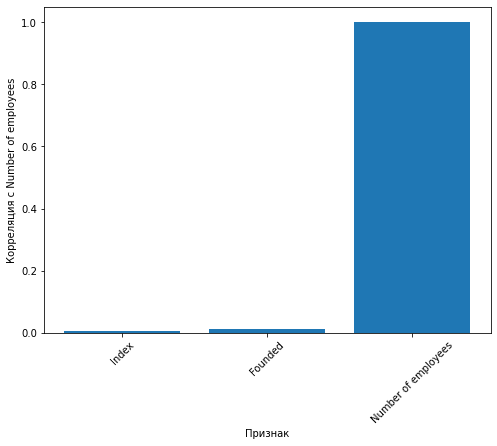

In [9]:
# Вычисление корреляций с целевой переменной 'Number of employees'
correlations = df.corrwith(df['Number of employees'])

# Создание тепловой карты для визуализации корреляций
plt.figure(figsize=(8, 6))
plt.bar(correlations.index, correlations)
plt.xticks(rotation=45)
plt.xlabel('Признак')
plt.ylabel('Корреляция с Number of employees')
plt.show()

In [11]:
# Выделим числовые и категориальные признаки
numerical_features = ['Founded', 'Number of employees']
categorical_features = ['Organization Id', 'Name', 'Website', 'Country', 'Description', 'Industry']

# Стандартизация числовых признаков
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Нормализация числовых признаков (в диапазон от 0 до 1)
min_max_scaler = MinMaxScaler()
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])

# Кодирование категориальных признаков с использованием one-hot encoding
df = pd.get_dummies(df, columns=categorical_features)

# Наш датасет предобработан

In [13]:
# Подготовка данных
X = df.drop('Number of employees', axis=1)  # Признаки
y = df['Number of employees']  # Целевая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор и обучение модели (например, линейная регрессия)
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 0.08899484342231233
